<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Projects/blob/main/Promotion_sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**EXPLORING DATASET**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


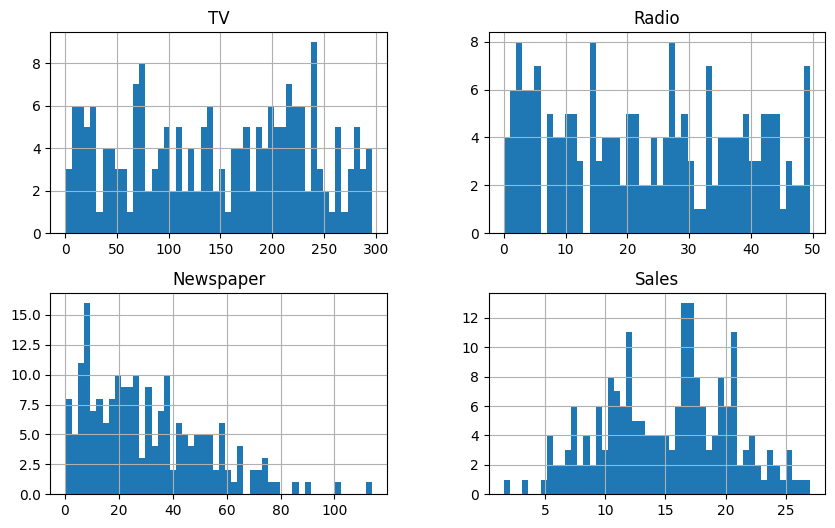

In [5]:
df.hist(bins = 50, figsize = (10,6))
plt.show()

In [9]:
df.corrwith(df['Sales'])

,0
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


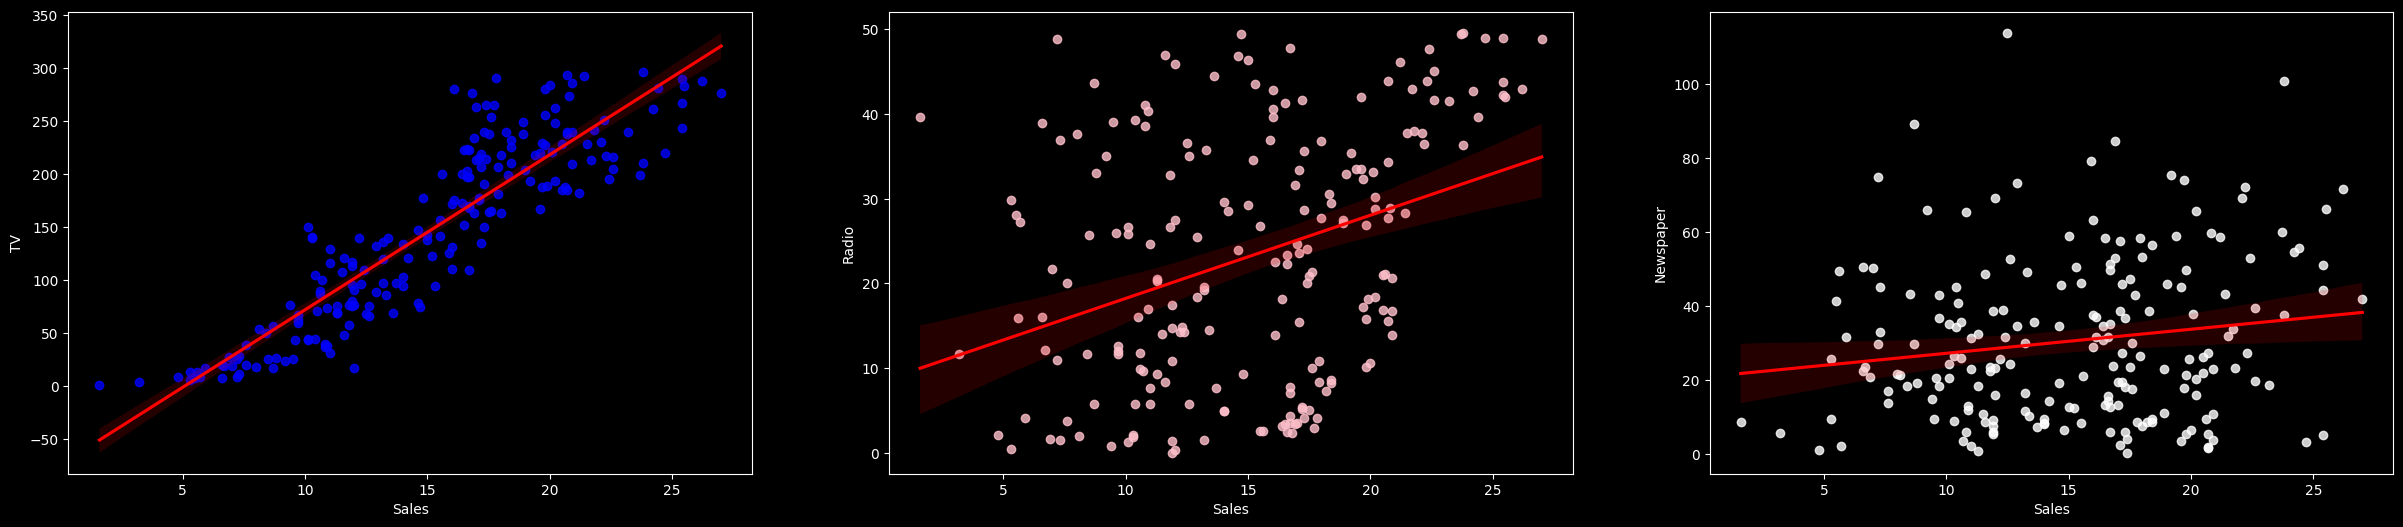

In [41]:
plt.figure(figsize=(30, 6))

plt.subplot(1, 3, 1, facecolor = 'black')
sns.regplot(data =df, x = 'Sales', y = 'TV', line_kws = {'color' : 'red'}, color='blue')

plt.subplot(1, 3, 2, facecolor = 'black')
sns.regplot(data =df, x = 'Sales', y = 'Radio', line_kws = {'color' : 'red'}, color='pink')

plt.subplot(1, 3, 3, facecolor = 'black')
sns.regplot(data =df, x = 'Sales', y = 'Newspaper', line_kws = {'color' : 'red'}, color='white')

plt.show()

In [77]:
TV_dataset = df[['TV', "Sales"]]
TV_dataset

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


**ML PREPARATION**

In [163]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(TV_dataset, test_size =0.1 , random_state=42)

train_data = train_set.drop('Sales', axis = 1)
train_label = train_set['Sales'].copy()

**PIPLINE**

In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

full_pipline = Pipeline([
    ("std_scaler", StandardScaler())
])

In [165]:
train_prepared = full_pipline.fit_transform(train_data)
train_prepared[:5,:]

array([[ 0.95672623],
       [-0.94025005],
       [-1.28984741],
       [ 1.20777936],
       [-0.9261723 ]])

**MACHINE LEARNING**

In [166]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

LR_model.fit(train_prepared, train_label)

LinearRegression()

In [167]:
train_sample = train_data.sample(5)
y = train_label.loc[train_sample.index]
sample_prepared = full_pipline.fit_transform(train_sample)

In [168]:
sample_predicted = LR_model.predict(sample_prepared)
pd.DataFrame({"Bashorat" : sample_predicted, "Real" : y})

,Bashorat,Real
125,6.453189,10.6
74,17.567120,17.0
21,19.680704,17.5
41,14.361517,17.1
92,17.945804,19.4


**TESTING**

In [169]:
test_data = test_set.drop('Sales', axis = 1)
test_label = test_set['Sales'].copy()

In [170]:
test_prepared = full_pipline.fit_transform(test_data)

In [171]:
test_predicted = LR_model.predict(test_prepared)
pd.DataFrame({"Bashorat" : test_predicted, "Real" : test_label})

,Bashorat,Real
95,16.494265,16.9
15,18.194426,22.4
30,23.358464,21.4
158,8.464847,7.3
128,19.513242,24.7
115,11.822796,12.6
69,19.327866,22.3
170,10.493387,8.4
174,19.624467,16.5
45,17.119246,16.1


**RESULTS**

In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_label, test_predicted)
mse = np.sqrt(mean_squared_error(test_label, test_predicted))


print(f'MAE:{mae}\nMSE:{mse}')

MAE:2.215052722940385
MSE:2.626487019757279


In [173]:
X = df.drop(['Sales', 'Radio', "Newspaper"], axis = 1)
Y = df['Sales'].copy()
x_prepared = full_pipline.fit_transform(X)

In [174]:
def show_scores(scores, name):
    print(name,"\n")
    print(f'Scores: {scores}\nMean Score: {scores.mean()}\nStd deviation: {scores.std()}')

In [175]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR_model, x_prepared, Y, scoring="neg_mean_squared_error", cv = 5)
show_scores(-scores, "LR_model")

LR_model 

Scores: [5.22565876 4.78053087 3.93698103 7.32431037 5.45979947]
Mean Score: 5.345456101166029
Std deviation: 1.1176969697134151


**ANOTHER MODELS**

In [176]:
from sklearn.tree import DecisionTreeRegressor
TREE_model = DecisionTreeRegressor()

TREE_model.fit(train_prepared, train_label)

DecisionTreeRegressor()

In [177]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

RF_model.fit(train_prepared, train_label)

RandomForestRegressor()

In [178]:
scores = cross_val_score(TREE_model, x_prepared, Y, scoring = 'neg_mean_squared_error', cv = 5)
show_scores(-scores, "TREE_model")

TREE_model 

Scores: [9.763     9.7883125 6.6595    7.6255    7.84775  ]
Mean Score: 8.3368125
Std deviation: 1.2409180359213903


In [179]:
scores = cross_val_score(RF_model, x_prepared, Y, scoring = 'neg_mean_squared_error', cv = 5)
show_scores(-scores, "RF_model")

RF_model 

Scores: [6.73643573 7.64704834 4.84865348 6.61578842 6.12620944]
Mean Score: 6.39482708122725
Std deviation: 0.9161208094995635


**For this dataset the best model for me, is RandomForesrRegressor**